In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Análise Exploratória
A análise a seguir compara os valores de três modelos de carros populares do ano de 2022, sendo: Chevrolet Onix, Volkswagen Polo e Hyundai HB20.
Os dados foram obtidos a partir de APIs do Mercado Livre.

In [38]:
df = pd.read_csv(r'../data/items.csv', sep=';', encoding='UTF-8', index_col=0)

In [3]:
df.head()

,id,site_id,title,category_id,price,base_price,original_price,city_name,state_name,country_name,brand,color,engine,fipe_price,kilometers,model,transmission,vehicle_year,transmission_type
0,MLB2221386163,MLB,Volkswagen Polo 1.0 200 Tsi Comfortline Aut Okm,MLB1744,97899.0,97899.0,0.0,São Paulo Zona Sul,São Paulo,Brasil,Volkswagen,Prateado,1.0,90541.0,0.0,Polo,Automática,2022,Automática
1,MLB3656689219,MLB,Volkswagen Polo 200tsi 1.0 Turbo Highline,MLB1744,80000.0,80000.0,0.0,Osasco,São Paulo,Brasil,Volkswagen,Cinza-escuro,1.0,80282.0,93000.0,Polo,Automática,2019,Automática
2,MLB3662549975,MLB,Volkswagen Polo 1.0 200 Tsi Comfortline Automá...,MLB1744,84900.0,84900.0,0.0,Diadema,São Paulo,Brasil,Volkswagen,Preto,1.0,90642.0,52515.0,Polo,AUTOMÁTICO,2022,Automática
3,MLB3663056289,MLB,Volkswagen Polo Comfortline 1.0 Tsi 200 Flex A...,MLB1744,89900.0,89900.0,0.0,Curitiba,Paraná,Brasil,Volkswagen,Branco,1.0,90642.0,43243.0,Polo,Automática,2022,Automática
4,MLB3680472567,MLB,Volkswagen Polo 2022 1.0 5p,MLB1744,69000.0,69000.0,0.0,Formiga,Minas Gerais,Brasil,Volkswagen,NaN,1.0,71148.0,20000.0,Polo,Manual,2022,Manual


In [4]:
df.shape

(130, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 129
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 130 non-null    object 
 1   site_id            130 non-null    object 
 2   title              130 non-null    object 
 3   category_id        130 non-null    object 
 4   price              130 non-null    float64
 5   base_price         130 non-null    float64
 6   original_price     130 non-null    float64
 7   city_name          130 non-null    object 
 8   state_name         130 non-null    object 
 9   country_name       130 non-null    object 
 10  brand              130 non-null    object 
 11  color              125 non-null    object 
 12  engine             126 non-null    object 
 13  fipe_price         130 non-null    float64
 14  kilometers         130 non-null    float64
 15  model              130 non-null    object 
 16  transmission       128 non-null

In [6]:
df[['price', 'kilometers']].describe()

,price,kilometers
count,130.000000,130.000000
mean,84963.092308,44825.238462
std,7175.623113,20659.085238
min,64900.000000,0.000000
25%,80112.500000,29381.750000
50%,84260.000000,48290.000000
75%,89900.000000,57491.250000
max,102900.000000,116200.000000


In [12]:
df.isnull().sum()

id                    0
site_id               0
title                 0
category_id           0
price                 0
base_price            0
original_price        0
city_name             0
state_name            0
country_name          0
brand                 0
color                 5
engine                4
fipe_price           78
kilometers            0
model                 0
transmission          2
vehicle_year          0
transmission_type     2
dtype: int64

In [13]:
df.sort_values(by='price', ascending=False).head()

,id,site_id,title,category_id,price,base_price,original_price,city_name,state_name,country_name,brand,color,engine,fipe_price,kilometers,model,transmission,vehicle_year,transmission_type
59,MLB4249320946,MLB,Volkswagen Polo Hatch Flex Automático,MLB1744,102900.0,102900.0,0.0,Osasco,São Paulo,Brasil,Volkswagen,Preto,1.0,92973.0,3771.0,Polo,Automática,2022,Automática
65,MLB4587585578,MLB,Volkswagen Polo 1.0 200 Tsi Highline Automático,MLB1744,98900.0,98900.0,0.0,Três Lagoas,Mato Grosso do Sul,Brasil,Volkswagen,Branco,1.0 200 TSI HIGHLINE AUTOMÁTICO,94640.0,12600.0,Polo,Automática,2022,Automática
42,MLB3714158321,MLB,Volkswagen Polo 1.0 200 Tsi Highline Automatico,MLB1744,98800.0,98800.0,0.0,São Paulo Zona Leste,São Paulo,Brasil,Volkswagen,PRATA,1.0,<NA>,29000.0,Polo,Automática,2022,Automática
114,MLB4725673662,MLB,Chevrolet Onix Hatch Ltz 1.0 12v Tb Flex 5p Au...,MLB1744,97999.0,97999.0,0.0,Bragança Paulista,São Paulo,Brasil,Chevrolet,Branco,1.0,<NA>,10480.0,Onix,Automática,2023,Automática
68,MLB4641560638,MLB,Polo Highline 200 Tsi 1.0 Flex Automatico 2022...,MLB1744,97990.0,97990.0,0.0,São Bernardo do Campo,São Paulo,Brasil,Volkswagen,Cinza-escuro,1.0,94732.0,26000.0,Polo,Automática,2022,Automática


In [39]:
fipe_price = df['fipe_price'].replace(0, pd.NA)
df['fipe_price'] = fipe_price

mean_price_by_brand = df.groupby('brand')[['price', 'fipe_price']].mean().reset_index()
mean_price_by_brand

,brand,price,fipe_price
0,Chevrolet,87458.52,85625.0625
1,Hyundai,80770.14,78065.35
2,Volkswagen,87792.30,85804.375


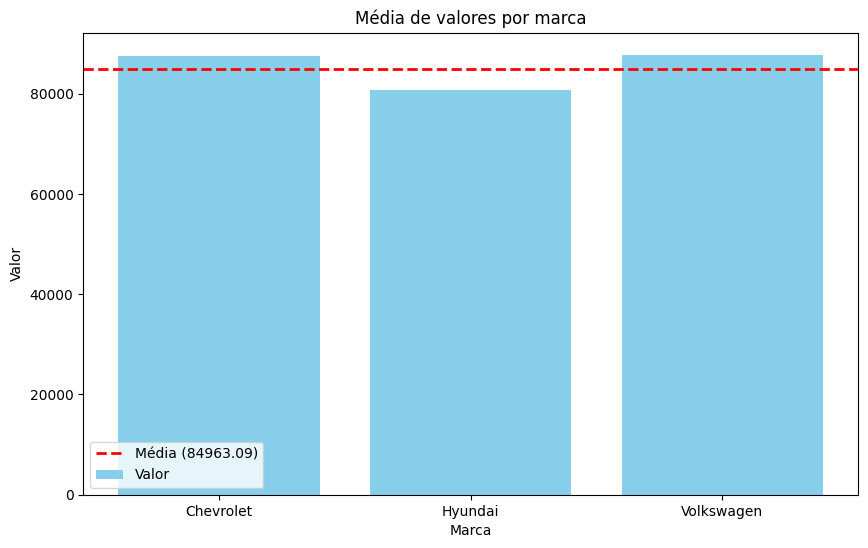

In [11]:
mean_price = df['price'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(mean_price_by_brand['brand'], mean_price_by_brand['price'], color='skyblue', label='Valor')

ax.axhline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Média ({mean_price:.2f})')

ax.set_title('Média de valores por marca')
ax.set_xlabel('Marca')
ax.set_ylabel('Valor')
ax.legend()

plt.show()

Observa-se que os carros da Hyundai são abaixo da média de preço entre as três marcas.

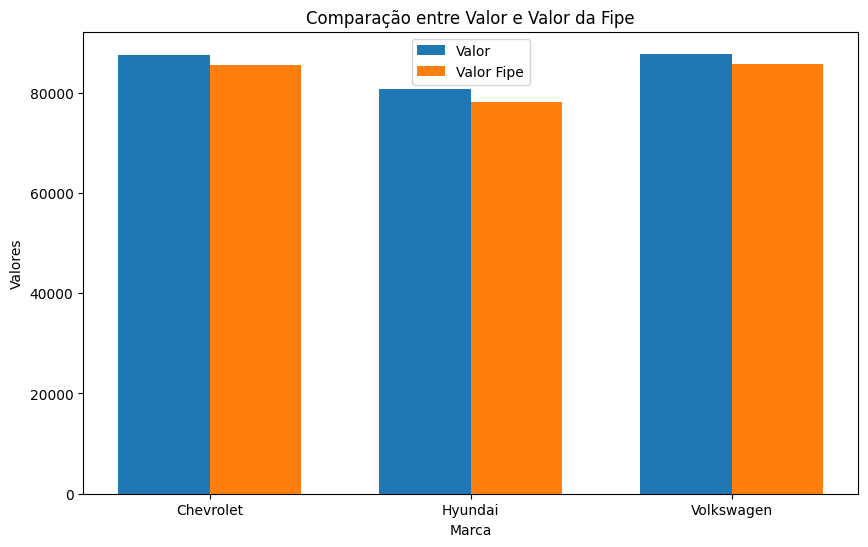

In [82]:
x = np.arange(len(mean_price_by_brand['brand']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, mean_price_by_brand['price'], width, label='Valor')
bar2 = ax.bar(x + width/2, mean_price_by_brand['fipe_price'], width, label='Valor Fipe')

ax.set_xlabel('Marca')
ax.set_ylabel('Valores')
ax.set_title('Comparação entre Valor e Valor da Fipe')
ax.set_xticks(x)
ax.set_xticklabels(mean_price_by_brand['brand'])
ax.legend()

plt.show()

E todas as marcas estão acima da tabela Fipe.

In [26]:
df[['price','kilometers','fipe_price']].corr()

,price,kilometers,fipe_price
price,1.000000,-0.625899,0.018175
kilometers,-0.625899,1.000000,-0.103294
fipe_price,0.018175,-0.103294,1.000000


Podemos observar pela correlação entre preço e kilometragem que a medida que o preço vai aumentando a kilometragem vai caindo, confirmando que os carros com menor kilometragem são mais caros.

In [43]:
mean_price_by_transmission = df.groupby(['brand', 'transmission_type'])[['price', 'fipe_price']].mean().reset_index()
mean_price_by_transmission['%'] = (mean_price_by_transmission['price'] / mean_price_by_transmission['fipe_price']) * 100
mean_price_by_transmission

,brand,transmission_type,price,fipe_price,%
0,Chevrolet,Automática,89094.400000,86955.923077,102.459265
1,Chevrolet,Manual,80915.000000,79858.0,101.323599
2,Hyundai,Automática,81532.488372,77999.733333,104.529189
3,Hyundai,Manual,76087.142857,78262.2,97.220808
4,Volkswagen,Automática,91378.760000,89186.615385,102.45793
5,Volkswagen,Manual,67933.333333,71148.0,95.481719


Os modelos com transmissão manual das marcas Hyundai e Volkswagen estão abaixo da tabela fipe, o que sugera que há uma desvalorização na revenda desses modelos.